In [27]:
import numpy as np
import pandas as pd
import seaborn as sns

import sys
sys.path.append('путь_до_папки/vulnerable_populations/additional_functions')
from functions import to_modify_dataframe, transform_to_changes, print_hist_and_box

##### Прочитаем данные о детской смертности в городской местности и преобразуем их.

In [28]:
child_mortality_urban = pd.read_excel('../social_russia_data/child_mortality_urban_1990_2021.xls', sheet_name=0, header=2, index_col=0)
child_mortality_urban = child_mortality_urban.drop(columns=['Unnamed: 1', 'Unnamed: 2'])
child_mortality_urban = to_modify_dataframe(child_mortality_urban)
child_mortality_urban = child_mortality_urban.rename(lambda arg: f'Число умерших за {arg} год детей в городской местности', axis=1)
child_mortality_urban.head()

Число регионов России - 85.


,Число умерших за 2015 год детей в городской местности,Число умерших за 2016 год детей в городской местности,Число умерших за 2017 год детей в городской местности,Число умерших за 2018 год детей в городской местности,Число умерших за 2019 год детей в городской местности,Число умерших за 2020 год детей в городской местности
Белгородская область,68.0,72.0,43.0,40.0,23.0,25.0
Брянская область,67.0,67.0,65.0,33.0,26.0,29.0
Владимирская область,76.0,72.0,59.0,45.0,43.0,51.0
Воронежская область,101.0,96.0,90.0,77.0,74.0,58.0
Ивановская область,48.0,51.0,31.0,28.0,31.0,25.0


##### Посмотрим корреляцию.

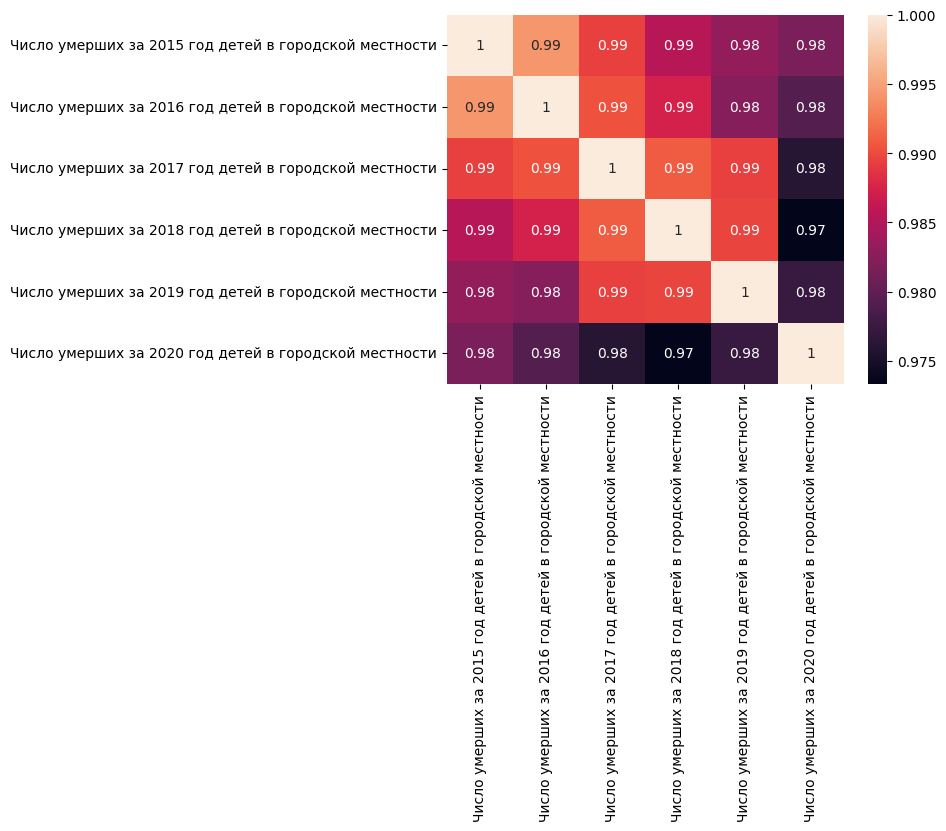

In [29]:
sns.heatmap(child_mortality_urban.corr(), annot=True);

##### Поскольку наблюдается очень высокая корреляция, давайте рассмотрим динамику.

In [30]:
child_mortality_urban_changes = transform_to_changes(child_mortality_urban)
child_mortality_urban_changes = child_mortality_urban_changes.rename(lambda arg: arg.replace('Число', 'Динамика числа') + ', в %', axis=1)
child_mortality_urban_changes.head()

/Users/familyafanasyevy/Documents/Денис/Skillfactory/vulnerable_populations/additional_functions/functions.py:192: RuntimeWarning: divide by zero encountered in scalar divide
  changes_index.append(round((values[i] - values[i - shift]) / values[i - shift] * 100, 6))


,"Динамика числа умерших за 2016 год детей в городской местности, в %","Динамика числа умерших за 2017 год детей в городской местности, в %","Динамика числа умерших за 2018 год детей в городской местности, в %","Динамика числа умерших за 2019 год детей в городской местности, в %","Динамика числа умерших за 2020 год детей в городской местности, в %"
Белгородская область,5.882353,-40.277778,-6.976744,-42.500000,8.695652
Брянская область,0.000000,-2.985075,-49.230769,-21.212121,11.538462
Владимирская область,-5.263158,-18.055556,-23.728814,-4.444444,18.604651
Воронежская область,-4.950495,-6.250000,-14.444444,-3.896104,-21.621622
Ивановская область,6.250000,-39.215686,-9.677419,10.714286,-19.354839


##### Взглянем на корреляцию теперь.

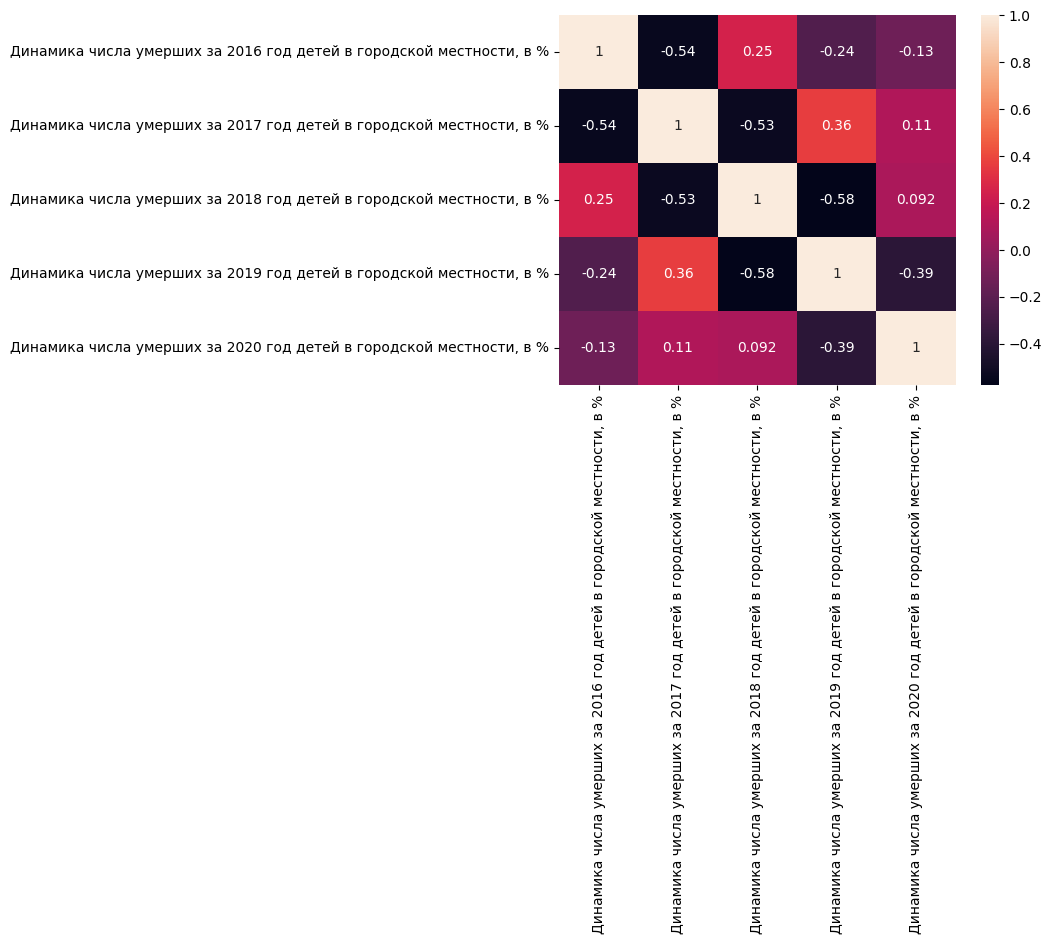

In [31]:
sns.heatmap(child_mortality_urban_changes.corr(), annot=True);

##### Высокой корреляции нет.

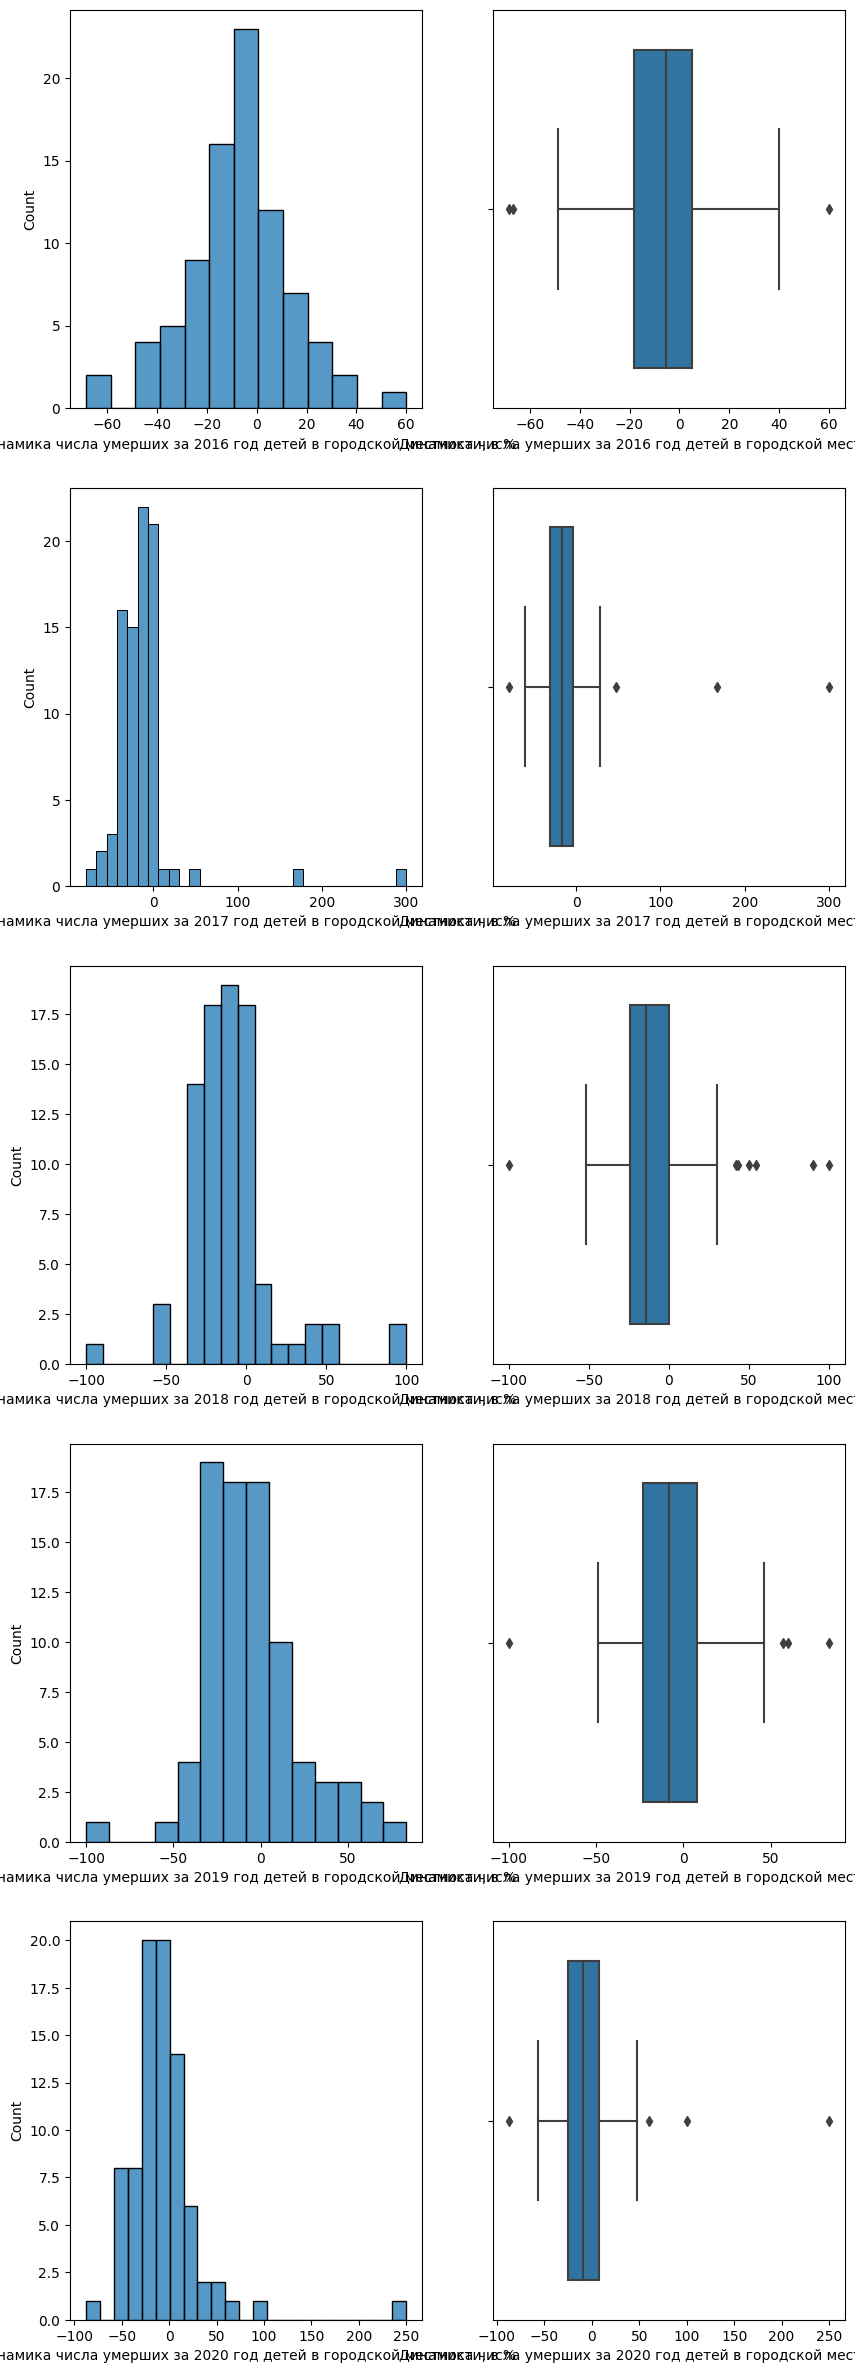

In [32]:
print_hist_and_box(child_mortality_urban_changes)

##### У нас имеется выброс, у которого в 2017 году детская смертность в городах увеличилась на 300%! Давайте посмотрим, что это за регион.

In [33]:
child_mortality_urban_changes[child_mortality_urban_changes['Динамика числа умерших за 2017 год детей в городской местности, в %'] == 300]

,"Динамика числа умерших за 2016 год детей в городской местности, в %","Динамика числа умерших за 2017 год детей в городской местности, в %","Динамика числа умерших за 2018 год детей в городской местности, в %","Динамика числа умерших за 2019 год детей в городской местности, в %","Динамика числа умерших за 2020 год детей в городской местности, в %"
Ненецкий автономный округ,-66.666667,300.0,-100.0,inf,100.0


##### Это Ненецкий автономный округ. Давайте посмотрим на него подробнее.

In [34]:
child_mortality_urban.loc['Ненецкий автономный округ']

Число умерших за 2015 год детей в городской местности    3.0
Число умерших за 2016 год детей в городской местности    1.0
Число умерших за 2017 год детей в городской местности    4.0
Число умерших за 2018 год детей в городской местности    0.0
Число умерших за 2019 год детей в городской местности    1.0
Число умерших за 2020 год детей в городской местности    2.0
Name: Ненецкий автономный округ, dtype: float64

##### Теперь всё ясно. В 2016 году в городах умер 1 ребёнок, а в 2017 году - 4. Поэтому и такая динамика - 300%. Не кажется ли вам, что это не совсем показательно? Я предлагаю рассмотреть детскую смертность по отношению к числу новорождённых за тот или иной год.
##### Однако давайте для начала прочтаем данные по детской смертности в сельской метсности.

In [35]:
child_mortality_rural = pd.read_excel('../social_russia_data/child_mortality_rural_1990_2021.xls', sheet_name=0, header=2, index_col=0)
child_mortality_rural = child_mortality_rural.drop(columns=['Unnamed: 1', 'Unnamed: 2'])
child_mortality_rural = to_modify_dataframe(child_mortality_rural)
child_mortality_rural = child_mortality_rural.rename(lambda arg: f'Число умерших за {arg} год детей в сельской местности', axis=1)
child_mortality_rural.head()

Число регионов России - 85.


,Число умерших за 2015 год детей в сельской местности,Число умерших за 2016 год детей в сельской местности,Число умерших за 2017 год детей в сельской местности,Число умерших за 2018 год детей в сельской местности,Число умерших за 2019 год детей в сельской местности,Число умерших за 2020 год детей в сельской местности
Белгородская область,42.0,36.0,34.0,33.0,16.0,22.0
Брянская область,44.0,36.0,31.0,12.0,11.0,12.0
Владимирская область,31.0,28.0,17.0,22.0,15.0,10.0
Воронежская область,25.0,24.0,18.0,22.0,7.0,12.0
Ивановская область,16.0,15.0,4.0,7.0,9.0,3.0


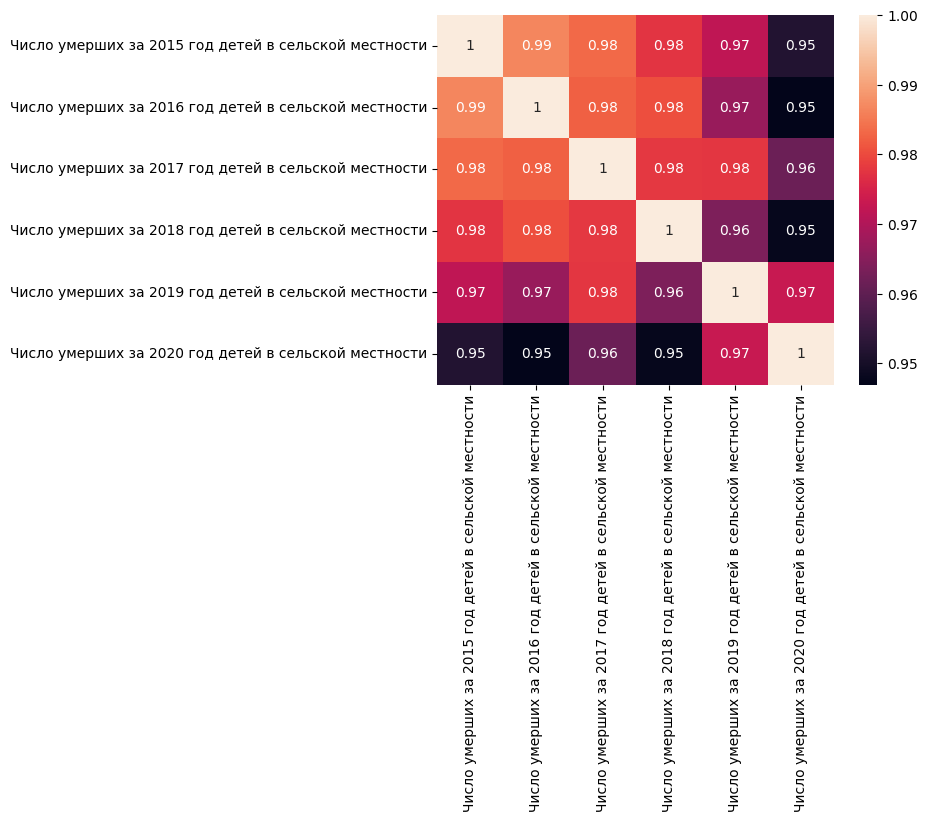

In [36]:
sns.heatmap(child_mortality_rural.corr(), annot=True);

##### А теперь прочитаем и предобработаем данные о новорождённых.

In [37]:
newborn = pd.read_csv('../social_russia_data/newborn_2006_2022_monthly.csv', sep=';', index_col=0)
newborn = to_modify_dataframe(newborn)
newborn.head()

Число регионов России - 85.


,январь 2015 г.,февраль 2015 г.,март 2015 г.,апрель 2015 г.,май 2015 г.,июнь 2015 г.,июль 2015 г.,август 2015 г.,сентябрь 2015 г.,октябрь 2015 г.,...,август 2021 г.,сентябрь 2021 г.,октябрь 2021 г.,ноябрь 2021 г.,декабрь 2021 г.,январь 2022 г.,февраль 2022 г.,март 2022 г.,апрель 2022 г.,май 2022 г.
Белгородская область,1432,1268,1450,1429,1395,1499,1775,1552,1629,1588,...,1154,1084,1053,990,1028,861,941,956,801,869
Брянская область,1071,1047,1123,1130,1095,1305,1306,1249,1190,1233,...,835,784,751,783,729,707,670,740,589,660
Владимирская область,1232,1156,1260,1295,1281,1446,1524,1571,1414,1400,...,864,783,834,769,821,691,700,708,660,711
Воронежская область,1923,1951,2164,2108,1950,2165,2426,2287,"2560,99","2186,99",...,1708,1643,1278,1758,1584,1342,1326,1576,1309,1319
Ивановская область,851,863,961,911,909,1032,1211,1019,1038,1060,...,630,620,598,609,614,562,506,628,536,562


##### Поскольку данные по детской смертности у нас даны по годам, а данные по новорожденным - по месяцам, то посчитаем сумму новорождённых за каждый год.
##### И для того, чтобы это сделать, необходимо будет преобразовать наши данные в целочисленный формат. Однако уже сейчас на примере Воронежской области мы видим, что в данных есть дробные значения. Как же так получилось? Не будем разбираться в этом, однако договоримся, что когда будем встречать дробное число, то будем округлять его в большую сторону.

In [38]:
for region in newborn.index:
    newborn.loc[region] = np.ceil(newborn.loc[region].apply(lambda arg: arg.replace(',', '.')).astype('float'))

##### Теперь посчитаем, сколько детей родилось в каждому году по отдельности, а затем объединим эти подсчёты в одну таблицу.

In [39]:
for_merge = []
while len(newborn.columns) > 0:
    newborn_temp = newborn[newborn.columns[:12]]
    newborn_temp = newborn_temp.cumsum(axis=1)
    for_merge.append(newborn_temp[newborn_temp.columns[-1]])
    newborn = newborn.drop(columns=newborn_temp.columns)

newborn = pd.DataFrame(for_merge[0])
for i in range(1, len(for_merge)):
    newborn = newborn.merge(
        right=for_merge[i],
        left_index=True,
        right_index=True
    )
newborn = newborn.rename(lambda arg: f"Число новорождённых в {arg.split(' ')[1]} году", axis=1)
newborn = newborn.drop(columns=newborn.columns[-1])
newborn.head()

,Число новорождённых в 2015 году,Число новорождённых в 2016 году,Число новорождённых в 2017 году,Число новорождённых в 2018 году,Число новорождённых в 2019 году,Число новорождённых в 2020 году,Число новорождённых в 2021 году
Белгородская область,17864.0,17261.0,15113.0,14318.0,13198.0,12352.0,12223.0
Брянская область,14067.0,13379.0,11553.0,11124.0,10028.0,9480.0,9047.0
Владимирская область,16284.0,15662.0,13395.0,12658.0,11158.0,10120.0,9780.0
Воронежская область,25924.0,24938.0,22423.0,21382.0,19643.0,19161.0,18593.0
Ивановская область,11761.0,11184.0,9877.0,9134.0,7951.0,7563.0,7327.0


##### Посмотрим, насколько коррелируют признаки из такой таблицы.

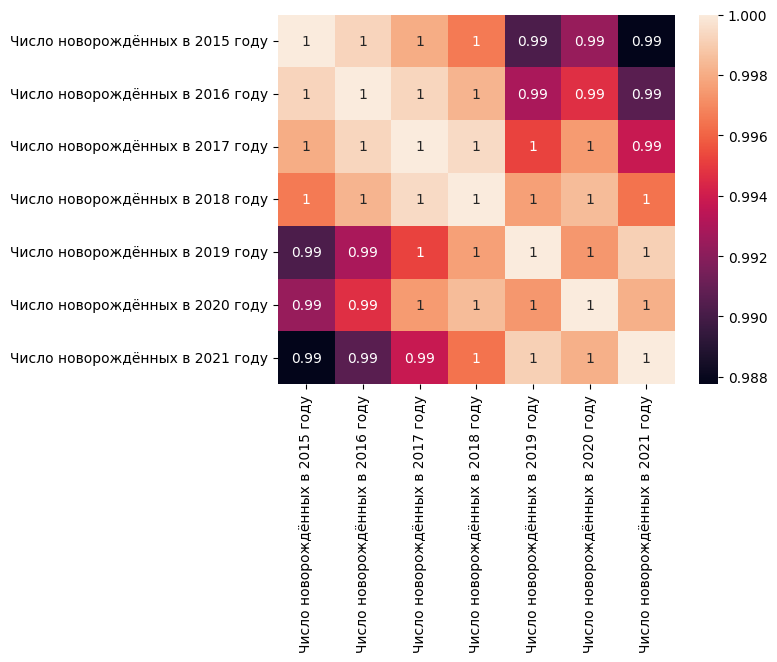

In [40]:
sns.heatmap(newborn.corr(), annot=True);

##### Коэффициенты корреляции очень большие. Посмотрим на динамику рождаемости.

In [41]:
newborn_changes = transform_to_changes(newborn)
newborn_changes = newborn_changes.rename(lambda arg: arg.replace('Число', 'Динамика'), axis=1)
newborn_changes.head()

,Динамика новорождённых в 2016 году,Динамика новорождённых в 2017 году,Динамика новорождённых в 2018 году,Динамика новорождённых в 2019 году,Динамика новорождённых в 2020 году,Динамика новорождённых в 2021 году
Белгородская область,-3.375504,-12.444238,-5.260372,-7.822322,-6.410062,-1.044365
Брянская область,-4.890879,-13.648255,-3.713321,-9.852571,-5.464699,-4.567511
Владимирская область,-3.819700,-14.474524,-5.502053,-11.850213,-9.302742,-3.359684
Воронежская область,-3.803425,-10.085011,-4.642555,-8.133009,-2.453800,-2.964355
Ивановская область,-4.906045,-11.686338,-7.522527,-12.951609,-4.879889,-3.120455


##### Посмотрим на корреляию.

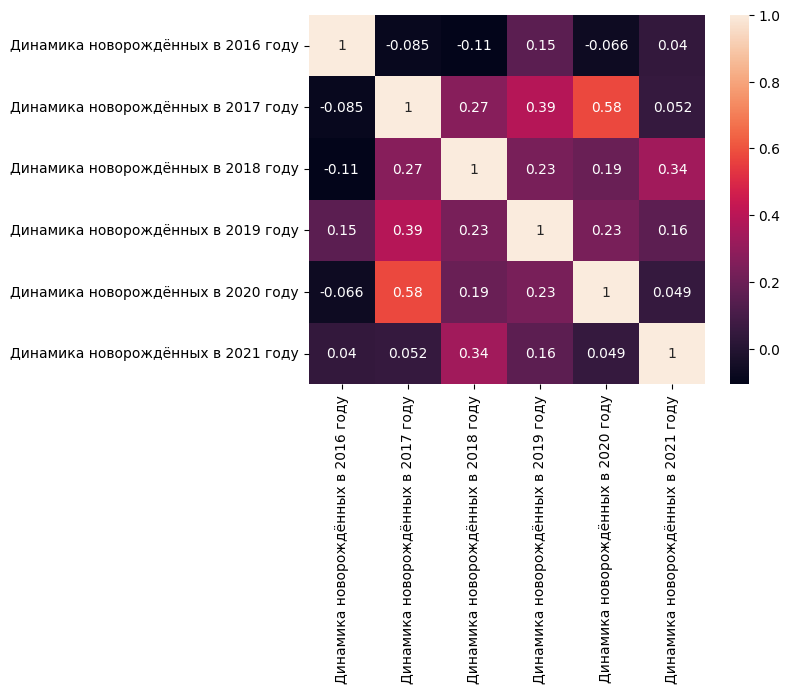

In [42]:
sns.heatmap(newborn_changes.corr(), annot=True);

##### Коррелция слабая, либо она отсутствует вовсе.

##### Сразу сохраним данные о рождаемости в отдельный файл.

In [43]:
newborn_changes.to_csv('../datasets_mod/newborn_changes.csv', sep=',')

##### Теперь, когда мы прочитали данные о рождаемости, можем посмотреть на отношение детской смертности к рождаемости.

In [44]:
# удалим столбец с данными о рождаемости за 2021 год, поскольку данных по десткой смертности за этот год нет.
newborn = newborn.drop(columns=newborn.columns[-1])

data = []
for i in range(len(newborn.columns)):
    data.append((child_mortality_rural[child_mortality_rural.columns[i]] / newborn[newborn.columns[i]] * 100).values)

child_mortality_rural_percent = pd.DataFrame(data=np.reshape(data, (6, 85)).T, index=newborn.index, columns=child_mortality_rural.columns)
child_mortality_rural_percent = child_mortality_rural_percent.rename(
    lambda arg: arg.replace('Число', 'Отношение числа') + ' к числу новорожденных, в %', axis=1
)
child_mortality_rural_percent.head()

,"Отношение числа умерших за 2015 год детей в сельской местности к числу новорожденных, в %","Отношение числа умерших за 2016 год детей в сельской местности к числу новорожденных, в %","Отношение числа умерших за 2017 год детей в сельской местности к числу новорожденных, в %","Отношение числа умерших за 2018 год детей в сельской местности к числу новорожденных, в %","Отношение числа умерших за 2019 год детей в сельской местности к числу новорожденных, в %","Отношение числа умерших за 2020 год детей в сельской местности к числу новорожденных, в %"
Белгородская область,0.23511,0.208563,0.224972,0.230479,0.12123,0.178109
Брянская область,0.312789,0.269078,0.268329,0.107875,0.109693,0.126582
Владимирская область,0.190371,0.178777,0.126913,0.173803,0.134433,0.098814
Воронежская область,0.096436,0.096239,0.080275,0.10289,0.035636,0.062627
Ивановская область,0.136043,0.13412,0.040498,0.076637,0.113193,0.039667


##### Смотрим корреляцию.

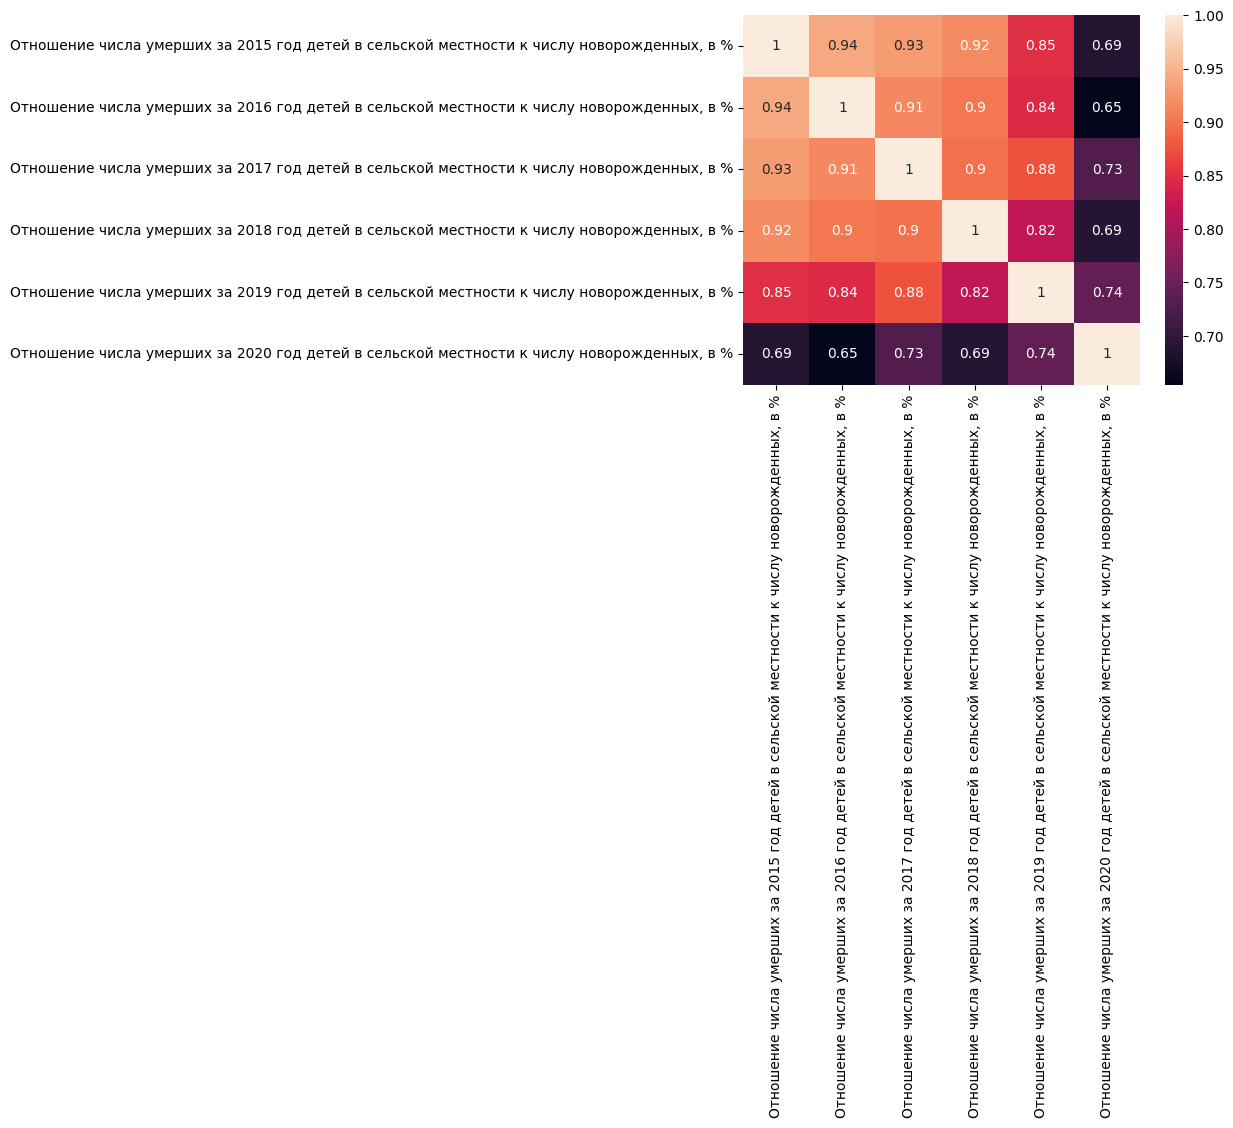

In [45]:
sns.heatmap(child_mortality_rural_percent.corr(), annot=True);

##### По этой тепловой карте мы видим, что очень сильно коррелируют между собой данные за 2015-2018 года. 2019 и 2020 года между собой коррелируют не так сильно, а потому я предлагаю оставить только их.

In [46]:
child_mortality_rural_percent = child_mortality_rural_percent[child_mortality_rural_percent.columns[[-2, -1]]]

##### Сохраним в файл.

In [47]:
child_mortality_rural_percent.to_csv('../datasets_mod/child_mortality_rural.csv', sep=',')

##### И осталось проделать всё то же самое и с данными о детской смертности в городах.

In [48]:
data = []
for i in range(len(newborn.columns)):
    data.append((child_mortality_urban[child_mortality_urban.columns[i]] / newborn[newborn.columns[i]] * 100).values)

child_mortality_urban_percent = pd.DataFrame(data=np.reshape(data, (6, 85)).T, index=newborn.index, columns=child_mortality_urban.columns)
child_mortality_urban_percent = child_mortality_urban_percent.rename(
    lambda arg: arg.replace('Число', 'Отношение числа') + ' к числу новорожденных, в %', axis=1
)
child_mortality_urban_percent.head()

,"Отношение числа умерших за 2015 год детей в городской местности к числу новорожденных, в %","Отношение числа умерших за 2016 год детей в городской местности к числу новорожденных, в %","Отношение числа умерших за 2017 год детей в городской местности к числу новорожденных, в %","Отношение числа умерших за 2018 год детей в городской местности к числу новорожденных, в %","Отношение числа умерших за 2019 год детей в городской местности к числу новорожденных, в %","Отношение числа умерших за 2020 год детей в городской местности к числу новорожденных, в %"
Белгородская область,0.380654,0.417125,0.284523,0.279369,0.174269,0.202396
Брянская область,0.476292,0.500785,0.562624,0.296656,0.259274,0.305907
Владимирская область,0.466716,0.459711,0.440463,0.355506,0.385374,0.503953
Воронежская область,0.3896,0.384955,0.401374,0.360116,0.376725,0.302698
Ивановская область,0.408129,0.456009,0.31386,0.306547,0.389888,0.330557


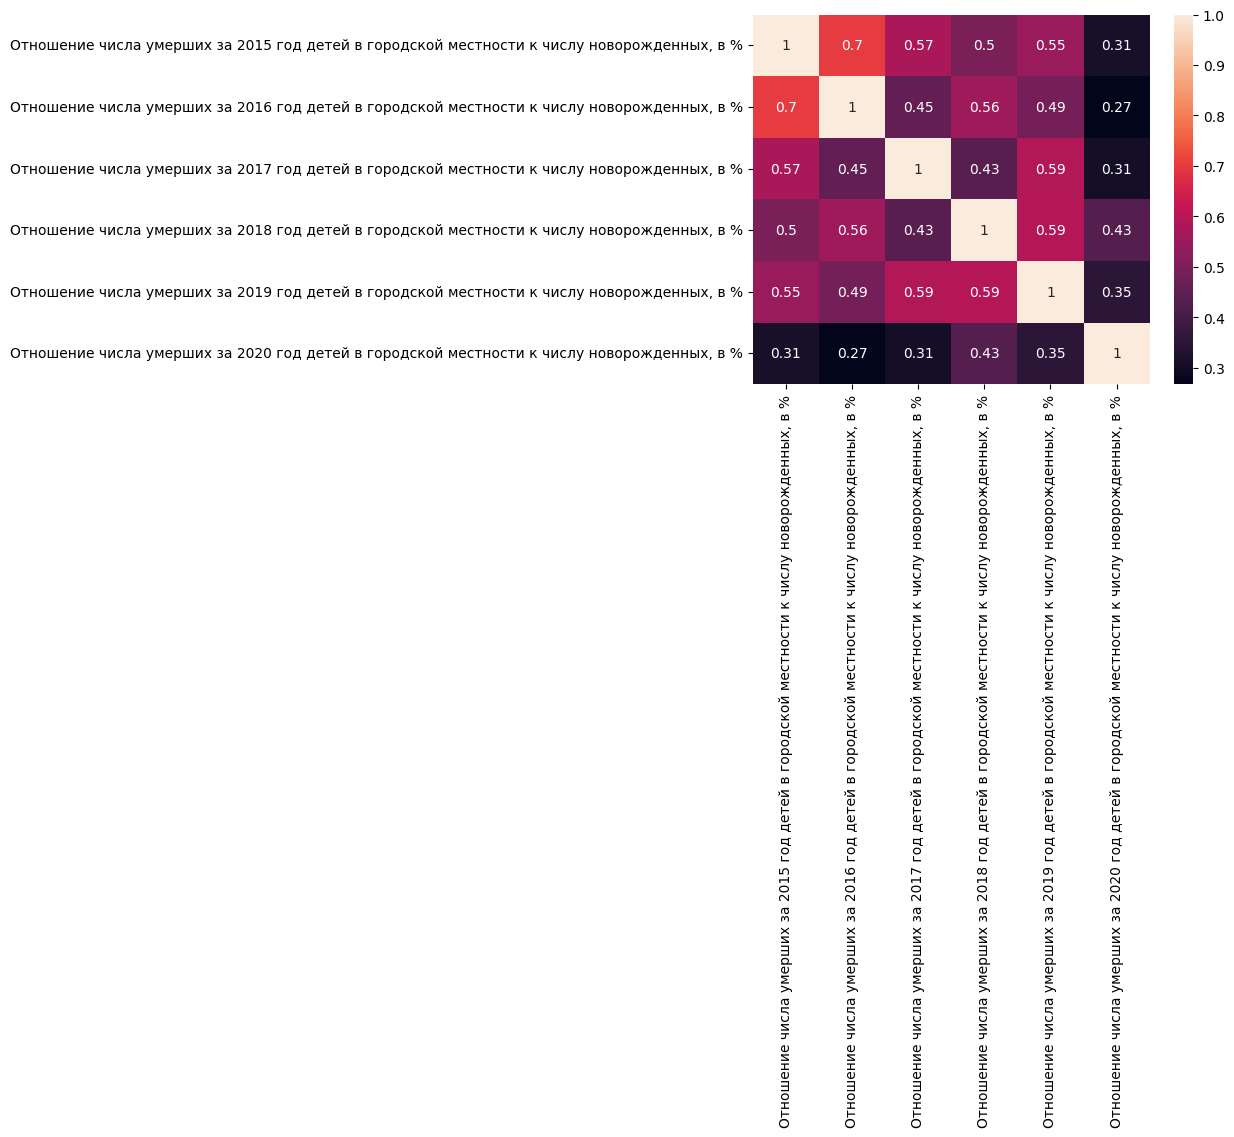

In [49]:
sns.heatmap(child_mortality_urban_percent.corr(), annot=True);

##### А здесь мы видим, что такой сильной корреляции, как было в случае отношения детской смертности в сельской местности, нет. Потому я предлагаю оставить все эти признаки, как они есть.

In [50]:
child_mortality_urban_percent.to_csv('../datasets_mod/child_mortality_urban.csv', sep=',')